## Estruturas de Dados

### Node
A estrutura de dados central do programa é o Node. Sua responsabilidade é representar os atributos das possíveis configurações geradas durante o jogo. Cada nó possui:
 - **state**: uma matriz 3x3 (numpy 2darray) que representa o estado do jogo;
 - **parent**: o nó pai do nó atual;
 - **depth**: a profundidade do nó na árvore de busca, que no caso do 8-puzzle serve como medida de custo para se chegar até a solução, uma vez que cada filho gerado aumenta em 1 o esforço gasto para se chegar até o objetivo;
 - **cost**: o custo do nó, que pode variar de acordo com o tipo de estratégia adotada para se explorar o espaço de estados, podendo ser correspondente à profundidade, ao número de peças fora do lugar ou à soma das distâncias de cada peça até sua posição final, dependendo da estratégia e da heurística adotada;
 
Node é uma classe de uso geral e foi feita de modo a ser reutilizável pelos diversos algoritmos de busca implementados. Dela foi extraída a classe InformedNode, cujo uso foi pensado para tratar os algoritmos de busca informada. Ela permite tratar a heurística especificada para cada caso no momento de geração dos nós filhos, acrescentando o atributo heuristic para tratar o custo de cada nó.

### InformedNode
InformedNode é uma subclasse de Node e foi extraída de modo a garantir flexibilidade para os nós e manter responsabilidades separadas entre as classes. Seu intuito é receber uma função heurística como atributo e calcular o custo de cada nó de acordo com a mesma.
- **heuristic**: a função heurística definida em código.

### Explored
Explorados é implementado como uma lista python que armazena aqueles nós que já foram expandidos pelos algoritmos.

### Fronteira
A fronteira armazena os nós que foram gerados porém ainda não foram explorados pelos algoritmos. Seu uso e exploração constituem a chave para o funcionamento de alguns dos algoritmos de busca que veremos a seguir. Cada um deles define uma forma de mantê-la e explorar os nós armazenados. Ela não é implementada como uma estrutura de dados fixa e sim como uma das variações que veremos a seguir.

### Queue
Essa estrutura de dados é usada para representar a **fronteira**, no caso do agoritmo Breadth-First Search (BFS). Ela funciona no modelo FIFO (First In, First Out), ou seja, o primeiro elemento a entrar é o primeiro a sair, fornecendo a base para acessar os nodos do espaço de estados sucessivamente em ordem. O uso é a partir da biblioteca queue, com a instanciação de um objeto de queue.Queue().

### Stack
A pilha tem papel fundamental na implementação do Depth-First Search (DFS), pois ela representa a **fronteira** do algoritmo cujo acesso se dá de maneira Last in, first out (LIFO) conforme os nodos são gerados. No caso do 8-puzzle, utiliza-se uma variação do DFS com limite de profundidade, que é utilizada pelo Iterative Deepening Search (IDS) para fazer buscas sucessivas no espaço.
    
Outro uso de uma stack foi no momento de impressão dos passos necessários para chegar até a solução. Os nós pai são sucessivamente guardados em uma pilha, que é percorrida posição a posição para a impressão. O emprego dessa estrutura de dados é a partir da biblioteca queue, com a instanciação de um objeto de queue.LifoQueue().

### Heap
A Heap - ou fila de prioridades - é uma estrutura de dados que representa a **fronteira** dos algoritmos que se utilizam de uma exploração coordenada aos nós de modo a sempre explorar aquele com custo corrente mínimo. São eles Uniform-cost search (Dijkstra), Greedy Best-First Search e A* search. Ela é uma árvore binária que mantém a propriedade de que o nó pai é sempre maior que seus filhos. Dessa forma, o nó com menor custo é sempre o primeiro a ser retirado da fronteira (raiz), o que garante que o algoritmo explore os nodos de menor custo com grande eficiência.

## Heurísticas
As heurísticas foram implementadas como funções, permitindo que sejam passadas como parâmetro para os algoritmos de busca informada, trazendo flexibilidade para a obtenção da informação sobre o custo de cada nó.

### Peças fora do lugar
A estimativa de custo realizada por essa heurística é feita com base no número de peças fora do lugar quando contrastadas com o objetivo. Ela é feita a partir do relaxamento que permite uma peça ser movida de A para B sem restrições. Sua admissibilidade é garantida pois o número de peças fora do lugar é sempre maior ou igual ao número de movimentos necessários para se chegar até a solução.

### Distância de Manhattan
Essa heurística surge do relaxamento do 8-puzzle em que uma peça pode ser movida de A para B caso A seja adjacente a B. Basicamente tem-se o somatório das distâncias de cada peça até sua posição final. Ela é admissível pois nunca superestima o custo para se chegar até a solução, uma vez que o número de movimentos necessários para se chegar até a posição final de uma peça é sempre maior ou igual à distância de Manhattan da mesma.

## Algoritmos

### Uninformed Search
Os algoritmos de busca sem informação exploram o espaço de estados sistematicamente até atingir o objetivo. Eles percorrem os nodos a partir de uma estratégia bem definida e sem conhecimentos prévios a respeito do custo de cada um.

#### Breadth-First Search (BFS)
A busca em largura é um algoritmo que percorre a árvore de busca expandindo o nó mais raso ainda não explorado. Desse modo, os nodos são explorados em ordem, conforme os níveis do espaço de estados.

#### Uniform Cost-Search (Dijkstra)
A busca que custo uniforme pode ser vista como um aprimoramento da BFS no sentido que possui um critério mais bem definido para explorar o espaço de estados. Essa avaliação é feita de maneira a escolher o nodo de menor custo corrente associado para ser expandido.

#### Iterative Deepening Search (IDS)
O IDS explora os nós da árvore de busca em níveis de maneira sucessiva. Começa explorando somente a raiz, depois a raiz e seus filhos, então a raiz, filhos e netos, e assim segue até alcançar o nível que contém o objetivo. Por apresentar esse comportamento, um mesmo nodo será expandido M - N + 1 vezes, onde M é o nível da meta e N, o do nó em questão.

### Informed Search
Os algoritmos que fazem busca informada se utilizam de uma função heurística **h(n)** para guiar sua expansão pelo espaço de estados.

#### Greedy Best-First Search
Esse algoritmo utiliza exclusivamente a função heurística como guia para o espaço de estados. Por ser uma busca gulosa, ele estabelece que o próximo nodo expandido seja sempre aquele cuja função de custo f(n) - neste caso **f(n) = h(n)** - seja minimizada REVIEW

#### A* Search
O algoritmo A* é um tipo de busca informada que combina o custo real para se chegar até um nodo com uma heurística para formar a função de custo. Sendo assim, temos a expressão **f(n) = g(n) + h(n)**, onde g(n) é o custo real para se alcançar o nó n. Uma vez gerados os estados, a escolha é feita por aquele que minimiza f(n).

### Local Search

#### Hill Climbing



In [16]:
import subprocess
import matplotlib.pyplot as plt
import time

In [20]:
args = ['python3', 'tp1.py']
algorithms = ['A', 'I', 'H', 'U', 'B', 'G']

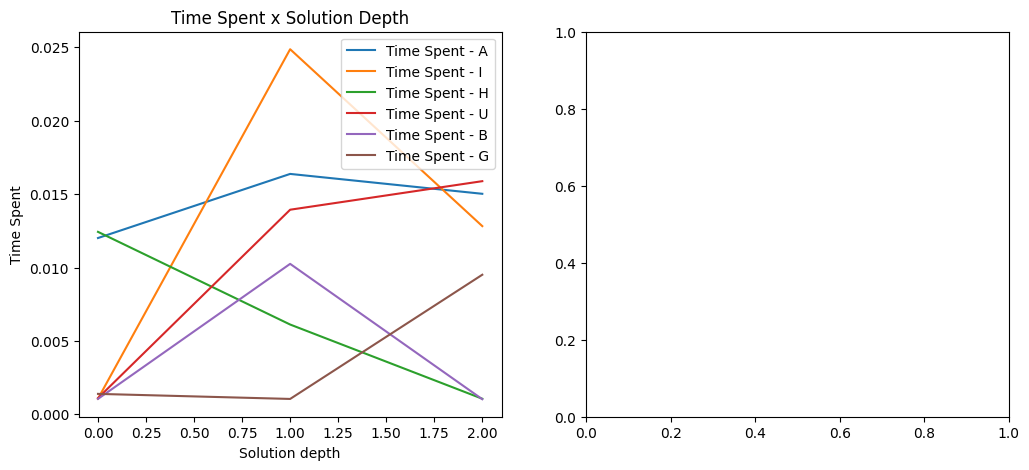

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

with open("input.txt", "r") as input_file:
    lines = [line.strip() for line in input_file.readlines()]
    for alg in algorithms:
        time_spent = []
        explored_nodes = []
        for entry in lines:
            start_time = time.time()
            process = subprocess.Popen(args + [alg] + entry.split(sep = ' '), stdout=subprocess.PIPE, text=True)
            output, _ = process.communicate()
            finish_time = time.time()
            time_spent.append(finish_time - start_time)
            print(output)
        
        axs[0].plot(range(0, 28), time_spent, label=f"{algs_dict[alg]}")
        axs[0].set(xlabel='Solution depth', ylabel='Time Spent (seconds)', title='Time Spent x Solution Depth')
        axs[0].legend()

        
        # You must be on branch "performance analysis" to run this part of the code
        axs[1].plot(range(0, 32), explored_nodes, label=f"{algs_dict[alg]}")
        axs[1].set(xlabel='Solution depth', ylabel='Explored Nodes', title='Explored Nodes x Solution Depth')
        axs[1].legend()
        
    
    plt.show()

## Discussão dos resultados obtidos